# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Naomi Sitanggang
- **Email:** naomistg5@gmail.com
- **ID Dicoding:** MC006D5X1986

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana Tren Penyewaan Sepeda dari Waktu ke Waktu?
- Pertanyaan 2 : Bagaimana Hubungan Antara suhu dengan Penyewaan Sepeda?
- Pertanyaan 3 : Bagaimana Perbedaan Jumlah Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan?
- Pertanyaan 4 : Pada Jam Berapa Jumlah Penyewaan Sepeda Mencapai Puncaknya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid")

**Insight:**
Import zip file dari folder

## Data Wrangling

### Gathering Data

In [ ]:


zip_path = "/content/Bike-sharing-dataset.zip"
extract_path = "/content/bike_data"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


os.listdir(extract_path)


['Readme.txt', 'hour.csv', 'day.csv']

In [ ]:
day_df = pd.read_csv(os.path.join(extract_path, "day.csv"))
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
Memuat data tabel day lalu membuat data frame

In [ ]:
hour_df = pd.read_csv(os.path.join(extract_path, "hour.csv"))
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
-Memuat data tabel hour lalu membuat data frame

### Assessing Data

In [ ]:
# Menilai data day_df
day_df.info()
day_df.isna().sum()
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()
Q1 = day_df["cnt"].quantile(0.25)
Q3 = day_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = day_df[(day_df["cnt"] < lower_bound) | (day_df["cnt"] > upper_bound)]
print(f"Jumlah outlier dalam data penyewaan sepeda harian: {len(outliers)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
Jumlah duplikasi:  0
Jumlah outlier dalam data penyewaan sepeda harian: 0


**Insight:**
Dari pemeriksaan data, terdapat kesalahan tipe data untuk kolom dteday, seharusnya direpresentasikan sebagai tipe data datetime bukan object

In [ ]:
# Menilai data hour_df
hour_df.info()
hour_df.isna().sum()
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = hour_df[(hour_df["cnt"] < lower_bound) | (hour_df["cnt"] > upper_bound)]
print(f"Jumlah outlier dalam data penyewaan sepeda per jam: {len(outliers)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
Jumlah duplikasi:  0
Jumlah outlier dalam data pe

**Insight:**
- Dari pemeriksaan data, terdapat kesalahan tipe data untuk kolom dteday, seharusnya direpresentasikan sebagai tipe data datetime bukan object
- Terdapat outlier dalam data sebanyak 505

### Cleaning Data

In [ ]:
# Menangani kesalahan tipe data
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

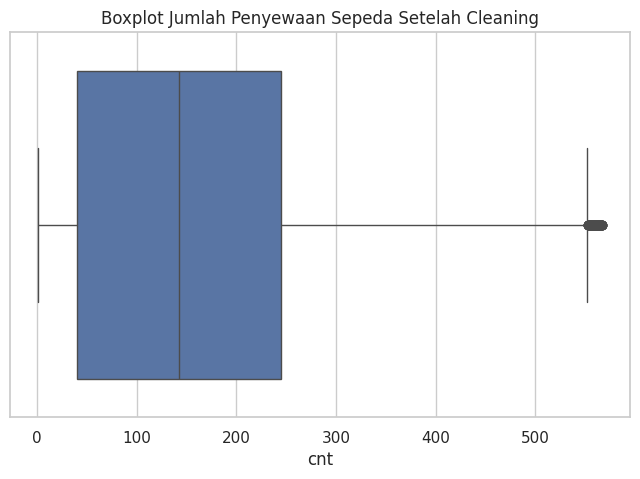

In [ ]:
# Menangani outlier data hour_df
Q1 = hour_df["cnt"].quantile(0.25)
Q3 = hour_df["cnt"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

hour_df['cnt'] = hour_df['cnt'].mask((hour_df['cnt'] < lower_bound) | (hour_df['cnt'] > upper_bound), hour_df['cnt'].median())

plt.figure(figsize=(8, 5))
sns.boxplot(x=hour_df["cnt"])
plt.title("Boxplot Jumlah Penyewaan Sepeda Setelah Cleaning")
plt.show()


**Insight:**
- Mengganti outlier dengan nilai median dengan menggunakan metode Imputation


## Exploratory Data Analysis (EDA)

### Explore data day_df

In [ ]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
Melihat rangkuman parameter statistik dari data day_df menggunakan metode describe()

In [ ]:
# Tren tahunan
yearly_trend = day_df.groupby('yr')['cnt'].agg(['sum', 'mean'])
print("Tren Tahunan:")
print(yearly_trend)

# Tren bulanan (contoh 2011 vs 2012)
monthly_comparison = day_df.pivot_table(
    index='mnth',
    columns='yr',
    values='cnt',
    aggfunc='mean'
)
print("\nRata-Rata Harian per Bulan (2011 vs 2012):")
print(monthly_comparison)


Tren Tahunan:
        sum         mean
yr                      
0   1243103  3405.761644
1   2049576  5599.934426

Rata-Rata Harian per Bulan (2011 vs 2012):
yr              0            1
mnth                          
1     1231.903226  3120.774194
2     1721.964286  3556.448276
3     2065.967742  5318.548387
4     3162.333333  5807.466667
5     4381.322581  6318.225806
6     4783.733333  6761.000000
7     4559.387097  6567.967742
8     4409.387097  6919.451613
9     4247.266667  7285.766667
10    3984.225806  6414.225806
11    3405.566667  5088.800000
12    2816.870968  3990.741935


In [ ]:
# Korelasi Pearson
corr_temp = day_df[['temp', 'cnt']].corr().iloc[0,1]
print(f"\nKorelasi Suhu-Penyewaan: {corr_temp:.2f}")

# Analisis kategori suhu
temp_bins = pd.cut(day_df['temp'], bins=[0, 0.3, 0.6, 1], labels=["Dingin", "Moderat", "Panas"])
temp_analysis = day_df.groupby(temp_bins)['cnt'].mean()
print("\nRata-Rata Penyewaan per Kategori Suhu:")
print(temp_analysis)


Korelasi Suhu-Penyewaan: 0.63

Rata-Rata Penyewaan per Kategori Suhu:
temp
Dingin     2381.214815
Moderat    4488.178363
Panas      5654.559055
Name: cnt, dtype: float64


<ipython-input-51-8e433996edcc>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_analysis = day_df.groupby(temp_bins)['cnt'].mean()


In [ ]:
day_df.groupby(by="weathersit").agg({
    "instant": "nunique",
    "temp": ["max", "min", "mean", "std"]
})

instant      temp                             
           nunique       max      min      mean       std
weathersit                                               
1              463  0.861667  0.05913  0.511541  0.191165
2              247  0.815000  0.10750  0.470366  0.167180
3               21  0.633913  0.21750  0.433440  0.131473

In [ ]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)


,instant
temp,
0.265833,5
0.635000,5
0.680000,4
0.710833,4
0.649167,4
...,...
0.390000,1
0.389167,1
0.389091,1


### Explore data hour_df

In [ ]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,162.963231
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,245.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,567.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,140.474058


**Insight:**
Melihat rangkuman parameter statistik dari data hour_df menggunakan metode describe()

In [ ]:
day_df.groupby(by="hum").instant.nunique().sort_values(ascending=False)
day_df.groupby(by="temp").instant.nunique().sort_values(ascending=False)


,instant
temp,
0.265833,5
0.635000,5
0.680000,4
0.710833,4
0.649167,4
...,...
0.390000,1
0.389167,1
0.389091,1


In [ ]:

hourly_peak = hour_df.groupby('hr')['cnt'].mean().sort_values(ascending=False)
print("\nTop 5 Jam Puncak:")
print(hourly_peak.head(5))


Top 5 Jam Puncak:
hr
16    288.550685
18    283.608516
19    274.813187
17    268.776712
12    230.252747
Name: cnt, dtype: float64


In [ ]:
workday_stats = hour_df.groupby('workingday')['cnt'].agg(['mean', 'median', 'std'])
print("\nAnalisis Hari Kerja vs Akhir Pekan:")
print(workday_stats)


Analisis Hari Kerja vs Akhir Pekan:
                  mean  median         std
workingday                                
0           162.550780   119.0  146.739073
1           163.154909   142.0  137.471307


### Explode data day_df & data hour_df

In [ ]:
# Menambah kolom keterangan
day_df["keterangan"] = "day"
hour_df["keterangan"] = "hour"

# Menggabungkan data day_df & data hour_df
combined_df = pd.concat([day_df,hour_df])

# Menghitung rata-rata temp per keterangan
temp_avg = combined_df.groupby("keterangan")["temp"].mean()
print(temp_avg)

keterangan
day     0.495385
hour    0.496987
Name: temp, dtype: float64


**Insight:**
Menghitung rata-rata suhu dari keterangan data

In [ ]:
data_bike = {"day": day_df, "hour": hour_df}
all_df = pd.concat(data_bike.values(),ignore_index=True)

**Insight:**
Menggabungkan dua tabel data menjadi satu data frame

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penyewaan Sepeda dari Waktu ke Waktu?

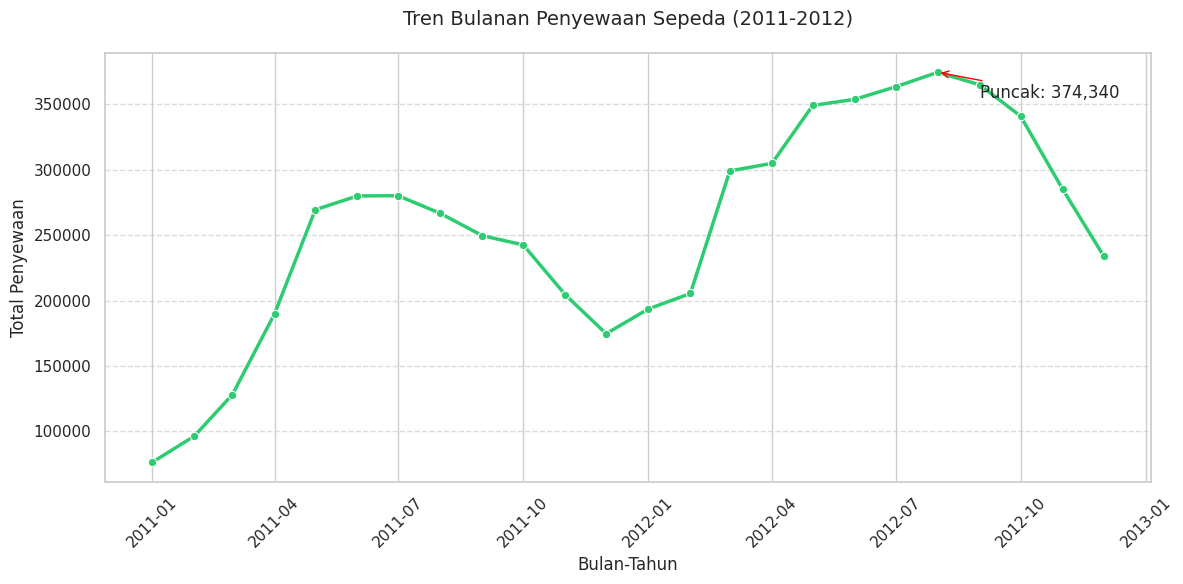

In [ ]:

# Konversi ke datetime dan ekstrak bulan-tahun
all_df['dteday'] = pd.to_datetime(all_df['dteday'])
all_df['year_month'] = all_df['dteday'].dt.to_period('M')

# Hitung total penyewaan per bulan
monthly_trend = all_df.groupby('year_month')['cnt'].sum().reset_index()
monthly_trend['year_month'] = monthly_trend['year_month'].dt.to_timestamp()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=monthly_trend,
    x='year_month',
    y='cnt',
    marker='o',
    color='#2ecc71',
    linewidth=2.5
)

plt.title('Tren Bulanan Penyewaan Sepeda (2011-2012)', fontsize=14, pad=20)
plt.xlabel('Bulan-Tahun', fontsize=12)
plt.ylabel('Total Penyewaan', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Anotasi puncak
peak_month = monthly_trend.loc[monthly_trend['cnt'].idxmax()]
plt.annotate(
    f'Puncak: {peak_month["cnt"]:,}',
    xy=(peak_month['year_month'], peak_month['cnt']),
    xytext=(peak_month['year_month'] + pd.DateOffset(months=1), peak_month['cnt'] - 20000),
    arrowprops=dict(arrowstyle='->', color='red')
)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Insight:**
- Dapat dilihat dari grafik bahwa terdapat trend penyewaan sepeda yang meningkat seiring waktu dan terlihat ada pola musiman pada bulan tertentu
- Puncak penyewaan paling tinggi sebesar 376.950

### Pertanyaan 2: Bagaimana Hubungan Antara suhu dengan Penyewaan Sepeda?



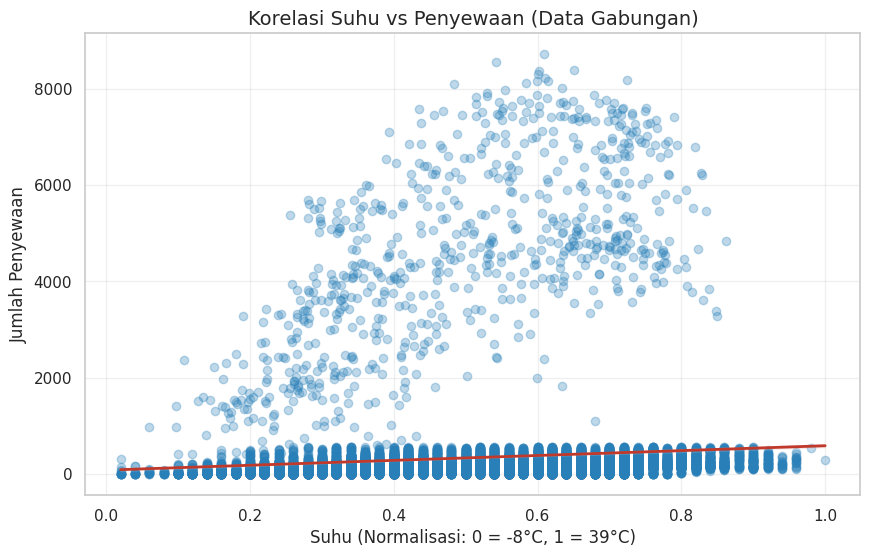

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=all_df['temp'],
    y=all_df['cnt'],
    scatter_kws={'alpha': 0.3, 'color': '#2980b9'},
    line_kws={'color': '#c0392b', 'lw': 2}
)

plt.title('Korelasi Suhu vs Penyewaan (Data Gabungan)', fontsize=14)
plt.xlabel('Suhu (Normalisasi: 0 = -8°C, 1 = 39°C)', fontsize=12)
plt.ylabel('Jumlah Penyewaan', fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Insight:**
 Dapat dilihat bahwa grafik scatter plot menunjukkan adanya hubungan positif antara suhu dan jumlah penyewaan sepeda. Hal ini berarti semakin tinggi suhu, semakin banyak sepeda yang disewa

### Pertanyaan 3 :  Bagaimana Perbedaan Jumlah Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan?

<ipython-input-62-73eb32a516c0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


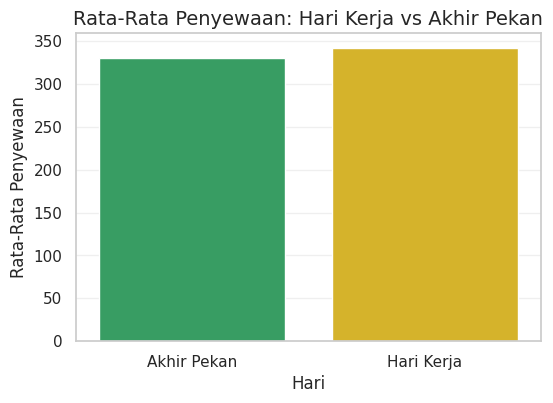

In [ ]:
# Hitung rata-rata penyewaan
workday_analysis = all_df.groupby('workingday')['cnt'].mean().reset_index()

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=workday_analysis['workingday'],
    y=workday_analysis['cnt'],
    palette=['#27ae60', '#f1c40f']
)

plt.title('Rata-Rata Penyewaan: Hari Kerja vs Akhir Pekan', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Rata-Rata Penyewaan', fontsize=12)
plt.xticks([0, 1], ['Akhir Pekan', 'Hari Kerja'])
plt.grid(axis='y', alpha=0.3)
plt.show()

**Insight:**
 Dapat dilihat dari visualisasi grafik jumlah penyewaan sepeda di akhir pekan dan di hari kerja tidak terlalu besar perbedaanya, artinya banyak orang yang menyewa sepeda tidak memilih milih hari tertentu

### Pertanyaan 4 : Pada Jam Berapa Jumlah Penyewaan Sepeda Mencapai Puncaknya?

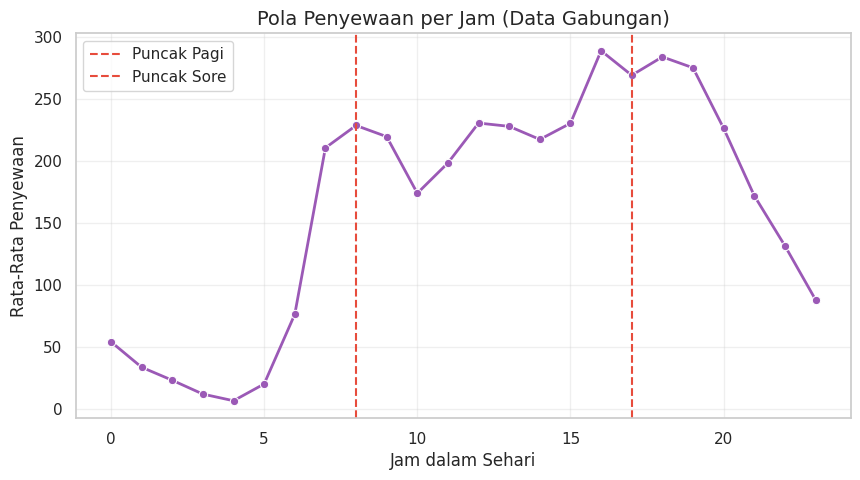

In [ ]:
# Asumsi kolom 'hr' ada di hour_df
hourly_peak = all_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(10, 5))
sns.lineplot(
    x=hourly_peak.index,
    y=hourly_peak.values,
    color='#9b59b6',
    marker='o',
    linewidth=2
)

plt.title('Pola Penyewaan per Jam (Data Gabungan)', fontsize=14)
plt.xlabel('Jam dalam Sehari', fontsize=12)
plt.ylabel('Rata-Rata Penyewaan', fontsize=12)
plt.axvline(x=8, color='#e74c3c', linestyle='--', label='Puncak Pagi')
plt.axvline(x=17, color='#e74c3c', linestyle='--', label='Puncak Sore')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**Insight:**
 Dapat dilihat dari visualisasi pola penyewaan berdasarkan jam, puncak penyewaan sepeda terbagi menjadi dua di pagi hari pada jam 08.00 dan di sore hari pada jam 17:00

## Analisis Lanjutan (Opsional)

Binning

<ipython-input-64-bbe6666d17d7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_analysis = all_df.groupby("hum_bin")["cnt"].agg(["mean", "std"])


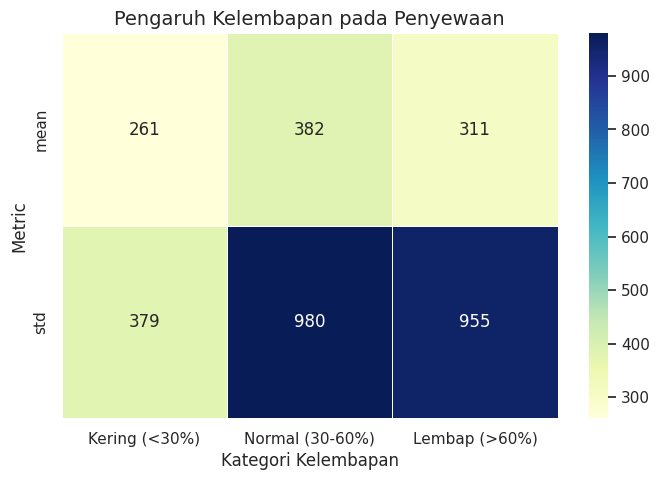

In [ ]:
# Binning kelembapan
all_df["hum_bin"] = pd.cut(all_df["hum"],
                          bins=[0, 0.3, 0.6, 1],
                          labels=["Kering (<30%)", "Normal (30-60%)", "Lembap (>60%)"])

# Visualisasi
hum_analysis = all_df.groupby("hum_bin")["cnt"].agg(["mean", "std"])
plt.figure(figsize=(8, 5))
sns.heatmap(
    hum_analysis.T,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    linewidths=0.5
)
plt.title("Pengaruh Kelembapan pada Penyewaan", fontsize=14)
plt.xlabel("Kategori Kelembapan", fontsize=12)
plt.ylabel("Metric", fontsize=12)
plt.show()

### Analisis Korelasi

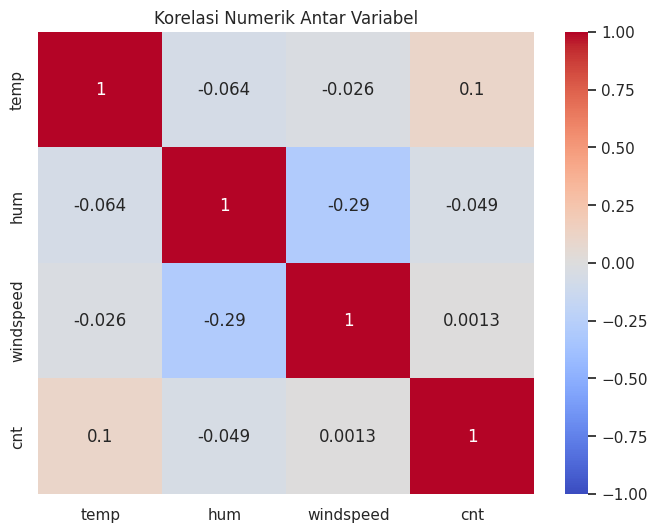

In [ ]:
corr_matrix = all_df[["temp", "hum", "windspeed", "cnt"]].corr()

# Heatmap Korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Korelasi Numerik Antar Variabel")
plt.show()

**Insight**

- Suhu memiliki korelasi positif kuat dengan penyewaan

- Kelembapan dan kecepatan angin berkorelasi negatif lemah


In [ ]:
all_df.to_csv("all_data.csv", index=False)